In [1]:
# the purpose of this notebook is to test an analytical solution for my model
# for the special case where bedrock erosion occurs only via abrasion, no plucking
# this means new coarse sediment cannot be generated in the model

$$\frac{\partial \eta}{\partial t} = \frac{\partial \eta_b}{\partial t} + \frac{\partial H}{\partial t}$$

> Total elevation change is equal to the change in bedrock elevation plus the change in sediment thickness.

$$\frac{\partial \eta_b}{\partial t} = U - E$$

$$\frac{\partial \eta_b}{\partial t} = U - Q_s\beta\alpha$$

$$\alpha = e^{-H/H^*}$$

> Bedrock elevation change is equal to uplift minus erosion due to abrasion over the exposed bed.

$$\frac{\partial H}{\partial t} = -\frac{1}{(1 - \phi)B} \left(\frac{\partial Q_s}{\partial x} + Q_s\beta - q_L \right)$$

$$q_L = \frac{E \gamma}{\beta} \left(1 - e^{-\beta x / 3}\right)$$

> Change in sediment thickness comes from sediment flux divergence, grain attrition, and lateral inputs. In the full version of the equation, there would be an additional term inside the parantheses representing additions to alluvial thickness via plucked material; this term is omitted here because plucking does not occur (therefore all sediment generated via bedrock erosion is fines).

$$U=E$$

$$\frac{\partial H}{\partial t} = 0$$

> At steady state, uplift equals erosion and sediment thickness is constant.

$$U = Q_s\beta\alpha$$

$$\alpha = \frac{U}{Q_s\beta}$$

$$e^{-H/H^*} = \frac{U}{Q_s\beta}$$

$$-\frac{H}{H^*} = \ln{\left(\frac{U}{Q_s\beta}\right)}$$

> We can make some substitutions...

$$E = Q_s \beta e^{\ln{\frac{U}{Q_s \beta}}}$$

$$E = \frac{Q_s \beta U}{Q_s \beta}$$

$$E = U$$

> This makes sense and is what we would expect; at steady state, erosion is just equal to uplift. This means we can simplify $q_L$ as follows:

$$q_L = \frac{U \gamma}{\beta} \left(1 - e^{-\beta x / 3}\right)$$

> We can now put these pieces together in our equation for the sediment layer at steady state, with the goal of solving for $S$.

$$0 = -\frac{1}{(1 - \phi)B} \left(\frac{\partial Q_s}{\partial x} + Q_s\beta - \frac{U \gamma}{\beta} \left(1 - e^{-\beta x / 3}\right) \right)$$

$$0 = \left(\frac{\partial Q_s}{\partial x} + Q_s\beta - \frac{U \gamma}{\beta} \left(1 - e^{-\beta x / 3}\right) \right)$$

$$\frac{\partial Q_s}{\partial x} = \frac{U \gamma}{\beta} \left(1 - e^{-\beta x / 3}\right) - Q_s\beta$$

$$Q_s = \frac{U \gamma x}{\beta} \left(1 - e^{-\beta x / 3}\right) - Q_s \beta x$$

$$Q_s + Q_s \beta x = \frac{U \gamma x}{\beta} \left(1 - e^{-\beta x / 3}\right)$$

$$Q_s ( 1 + \beta x) = \frac{U \gamma x}{\beta} \left(1 - e^{-\beta x / 3}\right)$$

$$Q_s = \frac{U \gamma x \left(1 - e^{-\beta x / 3}\right)}{\beta ( 1 + \beta x)}$$

> Almost there! Now we just need to make the following substitution for $Q_s$:

$$Q_s = k_{Qs}IQS^{7/6}$$

$$k_{Qs}IQS^{7/6} = \frac{U \gamma x \left(1 - e^{-\beta x / 3}\right)}{\beta ( 1 + \beta x)}$$

$$S^{7/6} = \frac{U \gamma x \left(1 - e^{-\beta x / 3}\right)}{\beta ( 1 + \beta x) k_{Qs}IQ}$$

$$S = \left(\frac{U \gamma x \left(1 - e^{-\beta x / 3}\right)}{\beta ( 1 + \beta x) k_{Qs}IQ}\right)^{6/7}$$

> This could be simplified and written a bit more neatly, but this is good enough for testing - see below!

In [2]:
# start by importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# # now set up arrays and parameters
# dx = 1 # grid spacing
# x = np.arange(0, 10, dx) # domain length

# # H = 100 + np.zeros(len(x)) # sediment thickness
# # z = np.linspace(1, 0.1, len(x)) # + H # need to start with slight bedrock slope
# z = np.zeros(len(x))

# U = 0.0005 # uplift rate
# phi = 0.55 # sediment porosity
# kqs = 0.041 # sediment discharge coefficient
# I = 0.01 # intermittency factor
# r = 10. # runoff rate
# kxb = 25 # valley width coeffecient
# Pxb = 1/5 # valley width exponent
# beta = 0.4
# # Hstar = 0.1 # characteristic sediment thickness
# gamma = 0.5

# B = kxb * (x**Pxb) # valley width 
# Q = B * r * x # total discharge

In [4]:
# define parameters

dx = 1000 # grid spacing
x = np.arange(0, 10000, dx) # domain length
r = 10. # runoff rate
kh = 1/3 # hack coefficient
h = 2 # hack exponent
Hstar = 0.5 # characteristic sediment thickness
# beta = np.zeros(len(x))
# beta[:3] = 0.0004
# beta[3:] = 0.004
beta = 0.004 # abrasion coefficient
# psi = 0.00004 # attrition factor
# K = np.zeros(len(x))
# K[:3] = 0.000001
# K[3:] = 0.00001
# K = 0.0001 # rock erodibility
gamma = 0.5 # fraction of coarse sediment from hillslope erosion
kxb = 25 # valley width coefficient
Pxb = 1/5 # valley width exponent
kb = 8.3e-8 # channel width coefficient
phi = 0.55 # sediment porosity
D = 0.05 # grain size
U = 0.0005

In [5]:
# set up arrays

H = Hstar + np.zeros(len(x)) # sediment thickness
etab = np.zeros(len(x)) # bedrock elevation array
etab[:] = np.linspace(1, 0.1, len(x)) # need to start with slight bedrock slope
eta = etab + H # total topographic elevation

In [6]:
# calculate constant, derivative values

B = kxb * (x**Pxb) # valley width
# Q = r * kh * (x**h) # total discharge
Q = r * B * x

# define more constants
kqs = 0.041 # sediment discharge coefficient
I = 0.01 # intermittency factor

In [7]:
numerator = (U*gamma*x)*(1 - np.exp(-(beta * x)/3))
denominator = beta*(1 + (beta*x))*(kqs*I*Q)

slope_pred = (numerator/denominator)**(6./7.)

/Users/vanessa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


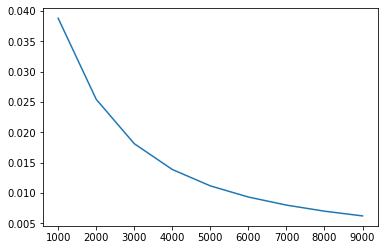

In [20]:
plt.plot(x, slope_pred)

In [21]:
# okay, now make a line using that constant slope
y = -slope_pred * x

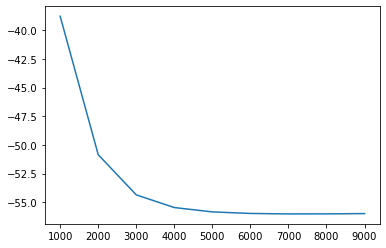

In [22]:
plt.plot(x, y)

In [23]:
def no_plucking(x,
          dx,
          Hstar,
          H,
          etab,
          eta,
          beta,
          gamma,
          kxb,
          Pxb,
          kb,
          phi,
          D,
          U,
          Q,
          B,
          num_steps = 7000000):
    
    # define more constants
    kqs = 0.041 # sediment discharge coefficient
    I = 0.01 # intermittency factor
    
    # calculate timestep
    dt_global = (0.2 * dx * dx / (kqs*Q[-1]))
    run_duration = dt_global * num_steps  # <== here's how long we want to run
    cum_time = 0.0  # <== keep track of elapsed time
    
    # define arrays
    b = np.zeros(len(x)) # channel width
    Eb_a = np.zeros(len(x)) # abrasion rate
    Eb = np.zeros(len(x)) # bedrock erosion rate
    Eh = np.zeros(len(x)) # sedimentation rate
    E = np.zeros(len(x)) # total erosion rate
    q = np.zeros(len(x)) # unit discharge
    Qs = np.zeros(len(x)) # total sediment transport
    qs = np.zeros(len(x)) # unit sediment transport
    ql = np.zeros(len(x)) # lateral sediment supply
    
    # set boundary conditions
    b[0] = 0
    H[-1] = 0
    E[-1] = U
    q[0] = 0
    Qs[0] = 0
    qs[0] = 0
    ql[0] = 0
    
    while cum_time < run_duration:  # <== use a while loop because dt varies by iteration
        
        # first calculate rates
            
        # calculate slope
        S = np.abs(np.diff(eta)/dx)
        
        # calculate channel width (L)
        b = (kb * Q[1:] * (S ** (7 / 6))) / (D**(3/2))
        
        # calculate unit discharge (L^2/T)
        q[1:] = Q[1:]/b
        
        # calculate bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calculate sediment transport (L^3/T and L^2/T)
        # Qs[1:] = c * I * Q[1:] * S**(7/6) * (1 - alpha[:-1])
        Qs[1:] = kqs * I * Q[1:] * np.sign(S) * (np.abs(S)) ** (7/6) * (1-alpha[:-1])
        qs[1:] = Qs[1:]/b
        
        # calculate individual erosion mechanism rates (L^2/T)
        Eb_a[:-1] = beta * Qs[1:] * alpha[:-1]
        
        # calculate total bedrock erosion rate (L/T)
        # Eb[:-1] = Eb_p[:-1] + Eb_a[:-1]
        Eb[:-1] = Eb_a[:-1] / B[1:]
        
        # calculate attrition rate (L^2/T)
        atr = beta * Qs
        
        # calculate lateral sediment inputs (L^2/T)
        ql = ((Eb * gamma) / beta) * (1 - np.exp(-beta * (x/3)))
        
        # calculate sedimentation rate (L/T)
        Eh[:-1] = - (1/ ((1 - phi) * B[1:])) * ((np.diff(Qs)/dx) + atr[1:] - ql[:-1])
        #Eh[1:] = - (1/ (1 - phi) * B[1:]) * ((np.diff(Qs)/dx) + atr[1:] - Eb_p[:-1] - ql[:-1])
        
        # calculate total erosion rate (L/T)
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        
        
        # Calculate maximum allowable time-step size
        
        #  set adaptive timestep
        #  first check time to flat surface
        elev_diff = np.diff(eta)/dx
        ero_diff = np.diff(E)/dx
        #valid_places = np.where(ero_diff < 0)
        valid_places = np.where(ero_diff < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(valid_places) > 0:  # <== in case there ARE no locations...
            times_to_flat = np.abs(elev_diff[valid_places]/ero_diff[valid_places])
        else:
            times_to_flat = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_flat = np.amin(times_to_flat)

        #  then check time to deplete all sediment
        #sed_depletion_locations = np.where(sedimentation_rate < 0)
        sed_depletion_locations = np.where(Eh < 0)[0]  # <== we just want the array, not the full tuple from where()
        if len(sed_depletion_locations) > 0:  # <== in case there ARE no locations...
            times_to_no_sed = np.abs(H[sed_depletion_locations]/Eh[sed_depletion_locations])
        else:
            times_to_no_sed = np.array([dt_global])  # <== ...we just revert to the global dt
        min_time_to_no_sed = np.amin(times_to_no_sed)

        #  check for smaller condition
        dt = min(min_time_to_flat, min_time_to_no_sed)

        #  if larger than global step size, limit to global
        dt = min(dt, dt_global)
        
        
        
        # Update quantities
        
        # update boundary conditions
        eta[-1] -= U * dt
        etab[-1] = eta[-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] += Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # Advance time
        cum_time += dt
        
        # print(dt, "timestep in years")
        
        if any(E[:] != U):
            continue
        else:
            break
            
    print(cum_time, "years")
        
    return (S, b, q, Qs, qs, Eb, atr, ql, Eh, E, eta, etab, H, dt)

In [24]:
# now write a test
test = [x, dx, Hstar, H, etab, eta, beta, gamma, kxb, Pxb, kb, phi, D, U, Q, B]

# and run it
S, b, q, Qs, qs, Eb, atr, ql, Eh, E, eta, etab, H, dt = no_plucking(*test)

2456479.934520905 years


In [25]:
# check for steady state condition
print(E)

[-4.02253274e-11  2.34209816e-11  3.13824148e-09  8.94846740e-09
  1.30620371e-08  1.34227679e-08  1.11269317e-08  7.91731761e-09
  4.87580656e-09  5.00000000e-04]


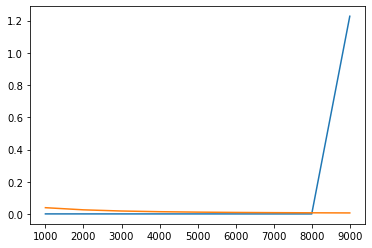

In [26]:
plt.plot(x[1:], S)
plt.plot(x, slope_pred)

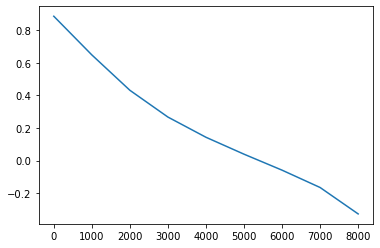

In [30]:
plt.plot(x[:-1], eta[:-1])
#plt.plot(x, y)